In [1]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


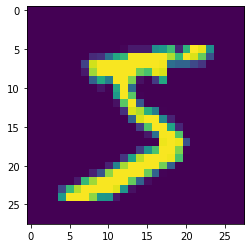

In [2]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [3]:
#check image shape
X_train[0].shape

(28, 28)

**Data Pre-Processing**

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Building The Model**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

**Compiling the model**

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Training a Model**

In [9]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 169s 3ms/step - loss: 0.2332 - accuracy: 0.9513 - val_loss: 0.0921 - val_accuracy: 0.9709
Epoch 2/3
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0655 - accuracy: 0.9804 - val_loss: 0.0798 - val_accuracy: 0.9772
Epoch 3/3
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0840 - val_accuracy: 0.9766


**Using our model to make predictions**

In [10]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[3.7841899e-10, 6.5031591e-14, 2.2700125e-12, 1.1119234e-09,
        8.8726337e-15, 2.3092527e-10, 3.6629804e-14, 9.9999964e-01,
        3.6625286e-07, 1.7058707e-09],
       [3.7246248e-10, 1.7741082e-09, 9.9999917e-01, 2.2006879e-11,
        3.9070782e-12, 5.3773998e-14, 3.5218014e-07, 2.1869110e-13,
        4.9783961e-07, 3.7367709e-14],
       [1.9186891e-07, 9.9991035e-01, 4.0697264e-06, 6.7747825e-09,
        1.7080332e-05, 1.4114819e-05, 1.9200941e-06, 2.2826896e-06,
        5.0008173e-05, 9.5604280e-09],
       [9.9999964e-01, 4.7576515e-13, 2.2871165e-10, 2.7582008e-13,
        2.3646439e-12, 3.9302152e-11, 1.8984049e-07, 3.3437297e-10,
        3.6421175e-09, 8.5040980e-08]], dtype=float32)

In [11]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)